In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/DiamondsPrices.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/opt/anaconda3/envs/StatMlDs/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

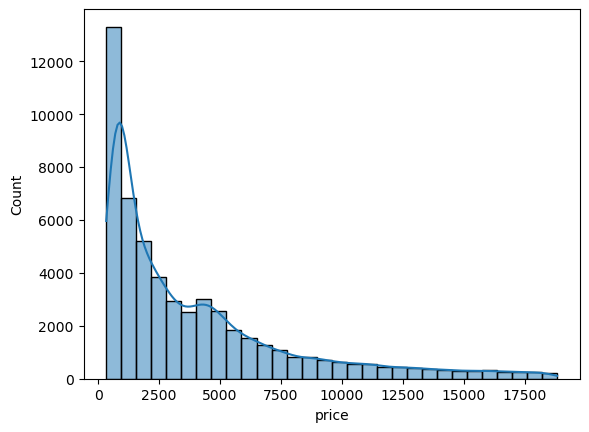

In [3]:
sns.histplot(df['price'], bins=30, kde=True)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
def outliers_QR(df, feature):
    mean = df[feature].mean()

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    threshold = 1.5
    upper = Q3 + threshold*IQR
    lower = Q1 - threshold*IQR

    outliers= df[(df[feature]< lower) | (df[feature]> upper) ]
    no_outliers = df[(df[feature]>= lower) & (df[feature]<= upper) ]

    return outliers, no_outliers

In [6]:
price_ol, price_no_ol = outliers_QR(df, 'price')
price_ol.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68


In [7]:
price_ol.describe()

,carat,depth,table,price,x,y,z
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,1.855528,61.661158,57.959915,14943.048305,7.841011,7.845506,4.825427
std,0.360354,1.455934,2.246442,1986.430051,0.563934,1.020991,0.397660
min,1.000000,56.200000,50.000000,11886.000000,0.000000,0.000000,0.000000
25%,1.530000,60.800000,56.000000,13170.500000,7.430000,7.440000,4.580000
50%,2.000000,61.800000,58.000000,14731.500000,7.960000,7.950000,4.890000
75%,2.060000,62.500000,59.000000,16616.250000,8.210000,8.190000,5.050000
max,5.010000,70.600000,95.000000,18823.000000,10.740000,58.900000,8.060000


In [8]:
price_no_ol.describe()

,carat,depth,table,price,x,y,z
count,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000
mean,0.723657,61.755603,57.421873,3159.460833,5.582965,5.586255,3.448359
std,0.383757,1.430780,2.229414,2764.700316,0.994872,0.993937,0.630422
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,61.800000,57.000000,2155.000000,5.590000,5.570000,3.430000
75%,1.010000,62.500000,59.000000,4669.000000,6.430000,6.420000,3.980000
max,3.650000,79.000000,79.000000,11883.000000,9.540000,31.800000,31.800000


/opt/anaconda3/envs/StatMlDs/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

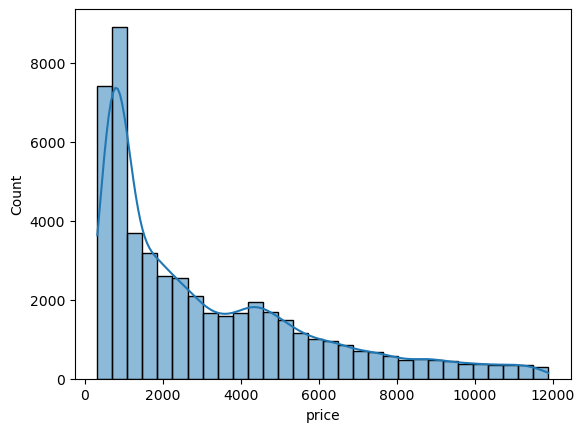

In [9]:
sns.histplot(price_no_ol['price'], bins=30, kde=True)

In [10]:
price_ol.shape

(3540, 10)

In [11]:
price_no_ol.shape

(50400, 10)

In [12]:
df.shape

(53940, 10)

In [13]:
def outliers_ZScore(df, feature):
    mean = df[feature].mean()
    std = df[feature].std()

    threshold = 3
    
    lower = mean - threshold*std
    upper = mean + threshold*std

    outliers = df[(df[feature]< lower) |  (df[feature] >  upper)]
    no_outliers = df[(df[feature]>= lower) &  (df[feature] <= upper)]
    return outliers, no_outliers

In [14]:
price_Z_ol, price_Z_no_ol = outliers_ZScore(df, 'price')

df.shape, price_Z_ol.shape, price_Z_no_ol.shape

((53940, 10), (1206, 10), (52734, 10))

In [15]:
df.shape, price_ol.shape, price_no_ol.shape

((53940, 10), (3540, 10), (50400, 10))

In [16]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
x_ol, x_no_ol = outliers_QR(df, 'x')
df.shape, x_ol.shape, x_no_ol.shape

((53940, 10), (32, 10), (53908, 10))

In [18]:
x_ol.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33


In [19]:
x_ol.describe()

,carat,depth,table,price,x,y,z
count,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.893438,61.78125,58.875000,13789.656250,7.239375,7.380000,4.446562
std,1.127977,2.74631,3.395918,4925.720341,4.258078,4.013235,2.636399
min,0.710000,56.10000,52.000000,2130.000000,0.000000,0.000000,0.000000
25%,2.812500,59.77500,57.750000,12142.000000,6.975000,8.510000,3.982500
50%,3.010000,62.15000,59.000000,15223.000000,9.430000,9.355000,5.620000
75%,3.545000,63.30000,60.250000,18022.000000,9.652500,9.600000,6.140000
max,5.010000,67.10000,67.000000,18710.000000,10.740000,10.540000,6.980000


In [20]:
y_ol, y_no_ol = outliers_QR(df, 'y')
df.shape, y_ol.shape, y_no_ol.shape

((53940, 10), (29, 10), (53911, 10))

In [26]:
df2 = pd.read_csv('./data/missing.csv')
df2.head()

,Name,Income
0,Shawn Palmer,28236.114017
1,Robert Marsh,20555.171637
2,Anthony Cooper,30450.091226
3,Thomas Miller,47170.073204
4,Lisa Hale,NaN


In [27]:
df2.describe()

,Income
count,298.000000
mean,24954.854774
std,14478.762448
min,4356.247628
25%,15683.675998
50%,22688.418154
75%,30161.441072
max,151201.058797


In [28]:
df2.Income.isnull().sum()

6

In [29]:
df2.dropna(subset=['Income'], inplace=True)
df2.Income.isnull().sum()

0

In [30]:
df2.shape

(298, 2)